# Evaluating the performance of linear regression models

## Multiple (more than three) linear regression model using scikit-learn

In [1]:
%config InlineBackend.figure_formats = {'png', 'retina'}

In [2]:
from sklearn.cross_validation import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

/Users/takumkawahara/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', header=None, sep='\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
pd.set_option("display.max_rows", 10)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [4]:
df.iloc[:,:-1]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [5]:
# Prepare Training set and Test set
X = df.iloc[:, :-1].values
y = df.iloc[:,-1].values # same as df['MEDV'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [6]:
# Training the model
slr = LinearRegression()
slr.fit(X_train, y_train)

/Users/takumkawahara/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

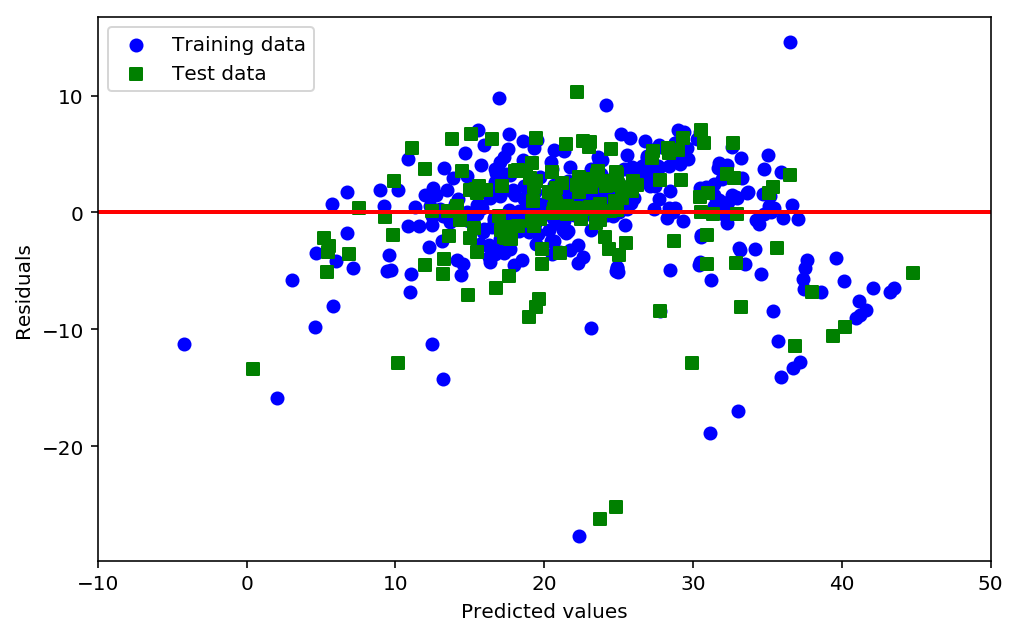

In [7]:
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

fig = plt.figure(figsize=(8, 5))
plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='green', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([-10, 50])
plt.show()

## MSE (Mean Squared Error)
$$
MSE = \frac{1}{n} \sum_{i=1}^{n}(y_{i} - \hat{y_{i}})^2
$$

In [8]:
from sklearn.metrics import mean_squared_error

print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),
                                      mean_squared_error(y_test, y_test_pred)))

MSE train: 19.958, test: 27.196


## RMSE (Root Mean Squared Error)
$$
RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n}(y_{i} - \hat{y_{i}})^2}
$$

In [9]:
import math
print('MSE train: %.3f, test: %.3f' % (math.sqrt(mean_squared_error(y_train, y_train_pred)),
                                      math.sqrt(mean_squared_error(y_test, y_test_pred))))

MSE train: 4.467, test: 5.215


## Coefficient of determination

Coefficient of determination (also known as R-squared, R2)
$$
R^2 = 1 - \frac{RSS}{TSS} = \frac{ESS}{TSS} = \frac{MSE}{\sigma_y} 
$$

RSS: Residual Sum of Squares
$$
RSS = \sum_{i=1}^{n}(y_i - \hat{y_i})^2
$$

TSS: Total Sum of Squares

$$
TSS = \sum_{i=1}^{n}(y_i - \bar{y})^2
$$

ESS: Explained Sum of Squares

$$
ESS = \sum_{i=1}^{n}(\hat{y_i} - \bar{y})^2
$$

In [10]:
from sklearn.metrics import r2_score
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),
                                      (r2_score(y_test, y_test_pred))))

R^2 train: 0.765, test: 0.673


## Adjusted R-squared (Adjusted-R2)  
Adjusted R-squared
$$
R^{\prime 2} = 1 - \frac{RSS}{TSS}\frac{N-1}{N-p-1} = \frac{ESS}{TSS}\frac{N-1}{N-p-1} = \frac{MSE}{\sigma_y} \frac{N-1}{N-p-1}
$$
  
$$
R^{\prime 2} = 1-(1-R^{2})\frac{N-1}{N-p-1}
$$
where p is the total number of explanatory variables in the model (not including the constant term), and n is the sample size.

### What Is the Adjusted R-squared? 
[Minitab blog](http://blog.minitab.com/blog/adventures-in-statistics-2/multiple-regession-analysis-use-adjusted-r-squared-and-predicted-r-squared-to-include-the-correct-number-of-variables)  
The adjusted R-squared compares the explanatory power of regression models that contain different numbers of predictors.  
  
Suppose you compare a five-predictor model with a higher R-squared to a one-predictor model. Does the five predictor model have a higher R-squared because it’s better? Or is the R-squared higher because it has more predictors? Simply compare the adjusted R-squared values to find out!  
  
The adjusted R-squared is a modified version of R-squared that has been adjusted for the number of predictors in the model. The adjusted R-squared increases only if the new term improves the model more than would be expected by chance. It decreases when a predictor improves the model by less than expected by chance. The adjusted R-squared can be negative, but it’s usually not.  It is always lower than the R-squared.

In [11]:
def adj_r2_score(y, yhat, model):
    from sklearn import metrics
    from sklearn.metrics import r2_score
    adjR2 = 1 - (1-r2_score(y, yhat))*float(len(y)-1)/(len(y)-1-len(model.coef_))
    return adjR2

In [12]:
print('adj-R^2 train: %.3f, test: %.3f' % (adj_r2_score(y_train, y_train_pred, slr),
                                      (adj_r2_score(y_test, y_test_pred, slr))))

adj-R^2 train: 0.756, test: 0.643


## AIC(Akaike's Information Criterion)



AIC
$$
AIC = -2\ln{L} + 2k
$$
where L is the maximum value of the likehood function for the model and k is the number of estimated parameters in the model.

For the Gaussian-noise simple linear regression model, we can define likehood function as below.  

### Gaussian-noise simple linear regression model  
1. The distribution of X is arbitrary (and perhaps X is even non-random).  
1. If X = x, then $Y = \beta_0 + \beta_1x + \epsilon$, for some constants (“coefficients”, “parameters”) $\beta_0$ and $\beta_1$, and some random noise variable $\epsilon$.  
1. $\epsilon ∼ N(0,\sigma^2)$, and is independent of X.  
1. $\epsilon$ is independent across observations.  
  
A consequence of these assumptions is that the response variable Y is indepen- dent across observations, conditional on the predictor X, i.e., Y1 and Y2 are independent given X1 and X2  
  
As you’ll recall, this is a special case of the simple linear regression model: the first two assumptions are the same, but we are now assuming much more about the noise variable ε: it’s not just mean zero with constant variance, but it has a particular distribution (Gaussian), and everything we said was uncorrelated before we now strengthen to independence1.  
Because of these stronger assumptions, the model tells us the conditional pdf of Y for each $x, p(y|x; \beta_0, \beta_1, \sigma^2)$. (This notation separates the random variables from the parameters.) Given any data set (x1, y1), (x2, y2), . . . (xn, yn), we can now write down the probability density, under the model, of seeing that data:

$$
\prod_{i=1}^n p(y_i|x_i; \beta_0, \beta_1, \sigma^2) = \prod_{i=1}^n \frac{1}{\sqrt{2\pi \sigma^2}}exp(-\frac{(y_i - (\beta_0+\beta_1x_i))^2}{2\sigma^2})
$$

In multiplying together the probabilities like this, we are using the independence of the Yi.
When we see the data, we do not known the true parameters, but any guess at them, say (b0, b1, s2), gives us a probability density:  

$$
\prod_{i=1}^n p(y_i|x_i; b_0, b_1, s^2) = \prod_{i=1}^n \frac{1}{\sqrt{2\pi \sigma^2}}exp(-\frac{(y_i - (b_0+b_1x_i))^2}{2s^2})
$$
  
This is the likelihood, a function of the parameter values. It’s just as informa- tive, and much more convenient, to work with the log-likelihood,

$$
\begin{eqnarray*}
\log L(b_0,b_1,s^2) &=& \log \prod_{i=1}^n p(y_i|x_i; b_0, b_1, s^2)\\
               &=& \sum_{i=1}^{n} \log p(y_i|x_i; b_0, b_1, s^2)\\
               &=& -\frac{n}{2}\log2\pi - n \log s - \frac{1}{2s^2}\sum_{i=1}^{n} (y_i - (b_0 + b_1x_i))^2
\end{eqnarray*}
$$

In the method of maximum likelihood, we pick the parameter values which maximize the likelihood, or, equivalently, maximize the log-likelihood. After some calculus (see notes below), this gives us the following estima- tors:

$$  
\hat{\beta_1} = \frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n}(x_i - \bar{x})^2} = \frac{c_{XY}}{s^2_X}\\
\hat{\beta_0} = \bar{y} - \hat{\beta_1}\bar{x}\\
\hat{\sigma^2} = \frac{1}{n}\sum_{i=1}^{n} (y_i - (\hat{\beta_0} + \hat{\beta_1}x_i))^2
$$

As you will recall, the estimators for the slope and the intercept exactly match the least squares estimators. This is a special property of assuming independent Gaussian noise. Similarly, $\sigmaˆ2$ is exactly the in-sample mean squared error.

Reference  
[CMU Lecture.6 17.Sep.2015](http://www.stat.cmu.edu/~cshalizi/mreg/15/lectures/06/lecture-06.pdf)

$$
\ln{L(b_0, b_1, s^2)} = -\frac{n}{2}\log2\pi + \frac{n}{2} \log{\frac{1}{s^2}} - \frac{1}{2s^2}\sum_{i=1}^{n} (y_i - (b_0 + b_1x_i))^2
$$

We need to find $b_0$,$b_1$,$s^2$ which maiximize the log-likehood function.
Usualy the log-likehood function is convex upward (?), so we can estimate the parameters with equations below.

$$
\frac{\partial \ln{L}}{\partial b_i} = 0\; (i = 0, 1) \\
\frac{\partial \ln{L}}{\partial \frac{1}{s^2}} = 0
$$
From 1st equation, we get

$$
\frac{\partial}{\partial b_i}\sum_{i=1}^{n} (y_i - (b_0 + b_1x_i))^2 = 0
$$

and this is exactly same as "Least square method". so we get $b_0 = \hat{\beta_0}$, $b_1 = \hat{\beta_1}$.

From 2nd equation, we get

$$
\frac{ns^2}{2} - \frac{1}{2}\sum_{i=1}^{n} (y_i - (b_0 + b_1x_i))^2 = 0\\
s^2 = \frac{1}{n}\sum_{i=1}^{n} (y_i - (b_0 + b_1x_i))^2
$$

Reference(Japanese)  
http://nlp.dse.ibaraki.ac.jp/~shinnou/zemi2017/ml-theory/ml-theory-shirai-0421.pdf  
https://mathwords.net/saisyonijoho

### Implimentation of AIC  
$$
\hat{\sigma^2} = \frac{RSS}{n}\\  
\ln L = -\frac{n}{2}\ln{2\pi \sigma^2} - \frac{1}{2\sigma^2}RSS\\ 
AIC = -2\ln{L} + 2k
$$  
From above equations, AIC is givne by following equations

$$
AIC = n\ln{\frac{2\pi RSS}{n}} + n + 2k
$$

Here, nln,$n$ and $n\ln{2\pi}$ are constant. So we need to minimize below.

$$
n\ln{RSS} + 2k
$$

Reference  
[CMU Lecture "36-401, Modern Regression, Section B"](http://www.stat.cmu.edu/~cshalizi/mreg/15/)  

Reference (Japanese)  
http://www.iwanttobeacat.com/entry/2018/02/24/123626  
https://qiita.com/kenmatsu4/items/b28d1b3b3d291d0cc698

In [14]:
def AIC(y, yhat, model):
    from sklearn import metrics
    import math
    aic = len(y)*math.log(2*math.pi*((y - yhat)**2).sum()/len(y)) + len(y) + 2*len(model.coef_)
    return aic

In [16]:
print('AIC train: %.3f, test: %.3f' % (AIC(y_train, y_train_pred, slr),
                                      (AIC(y_test, y_test_pred, slr))))

AIC train: 2090.357, test: 959.424
